          ID            Datetime  Count  hour
0          0 2012-08-25 00:00:00      8     0
1          1 2012-08-25 01:00:00      2     1
2          2 2012-08-25 02:00:00      6     2
3          3 2012-08-25 03:00:00      2     3
4          4 2012-08-25 04:00:00      2     4
...      ...                 ...    ...   ...
18283  18283 2014-09-25 19:00:00    868    19
18284  18284 2014-09-25 20:00:00    732    20
18285  18285 2014-09-25 21:00:00    702    21
18286  18286 2014-09-25 22:00:00    580    22
18287  18287 2014-09-25 23:00:00    534    23

[18288 rows x 4 columns]
         ID            Datetime  hour
0     18288 2014-09-26 00:00:00     0
1     18289 2014-09-26 01:00:00     1
2     18290 2014-09-26 02:00:00     2
3     18291 2014-09-26 03:00:00     3
4     18292 2014-09-26 04:00:00     4
...     ...                 ...   ...
5107  23395 2015-04-26 19:00:00    19
5108  23396 2015-04-26 20:00:00    20
5109  23397 2015-04-26 21:00:00    21
5110  23398 2015-04-26 22:00:00    22
5111

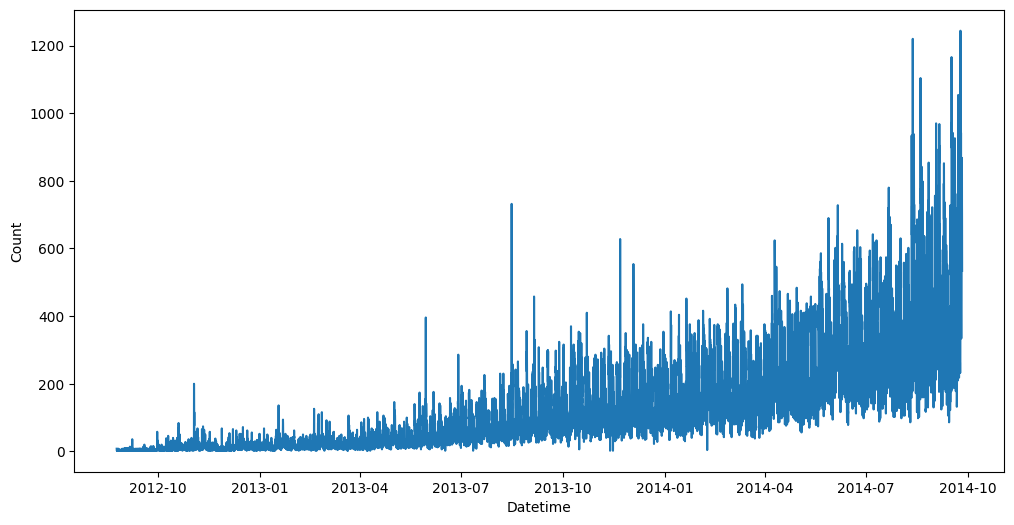

In [10]:
# Importing datasets
import pandas as pd
import numpy as np
#from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns
# Read train and test

train = pd.read_csv(r'/content/drive/MyDrive/MTech Internship/Train_SU63ISt.csv')
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train['hour'] = train.Datetime.dt.hour

test = pd.read_csv(r'/content/drive/MyDrive/MTech Internship/Test_0qrQsBZ.csv')
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test['hour'] = test.Datetime.dt.hour

print(train)
print(test)
plt.figure(figsize=(12, 6))
sns.lineplot(data = train, x = 'Datetime', y = 'Count')
plt.show()

In [13]:
# Calculate average hourly fraction
hourly_frac = train.groupby(['hour'])['Count'].mean()/np.sum(train.groupby(['hour'])['Count'].mean())
# print(hourly_frac)
print(hourly_frac)
# drop ID column
hourly_frac.drop(['ID'])
hourly_frac.columns = ['fraction']
print(hourly_frac)


# convert to time series from dataframe
train.index = train.Datetime
train.drop(['ID','hour','Datetime'], axis = 1, inplace = True)

daily_train = train.resample('D').sum()
# print(daily_train)

hour
0     0.044287
1     0.035343
2     0.029911
3     0.024714
4     0.020802
5     0.018621
6     0.020023
7     0.023221
8     0.026741
9     0.034555
10    0.049047
11    0.054375
12    0.054951
13    0.048600
14    0.051965
15    0.051309
16    0.049999
17    0.051164
18    0.052423
19    0.055627
20    0.053455
21    0.049895
22    0.050076
23    0.048892
Name: Count, dtype: float64
hour
0     0.044287
1     0.035343
2     0.029911
3     0.024714
4     0.020802
5     0.018621
6     0.020023
7     0.023221
8     0.026741
9     0.034555
10    0.049047
11    0.054375
12    0.054951
13    0.048600
14    0.051965
15    0.051309
16    0.049999
17    0.051164
18    0.052423
19    0.055627
20    0.053455
21    0.049895
22    0.050076
23    0.048892
Name: Count, dtype: float64


In [ ]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'],axis = 1, inplace = True)
print(daily_train)


                   ds      y
Datetime                    
2012-08-25 2012-08-25     76
2012-08-26 2012-08-26     88
2012-08-27 2012-08-27     62
2012-08-28 2012-08-28     58
2012-08-29 2012-08-29     60
...               ...    ...
2014-09-21 2014-09-21   9102
2014-09-22 2014-09-22  14116
2014-09-23 2014-09-23  13304
2014-09-24 2014-09-24  16856
2014-09-25 2014-09-25  14152

[762 rows x 2 columns]


In [ ]:
from prophet import Prophet
m = Prophet(yearly_seasonality = True, seasonality_prior_scale=0.1)
m.fit(daily_train)
future = m.make_future_dataframe(periods=213)
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiv1q3iyv/4dg6q5e9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpiv1q3iyv/0nokexm9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50728', 'data', 'file=/tmp/tmpiv1q3iyv/4dg6q5e9.json', 'init=/tmp/tmpiv1q3iyv/0nokexm9.json', 'output', 'file=/tmp/tmpiv1q3iyv/prophet_modelhgo752gn/prophet_model-20250123064346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:43:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:43:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


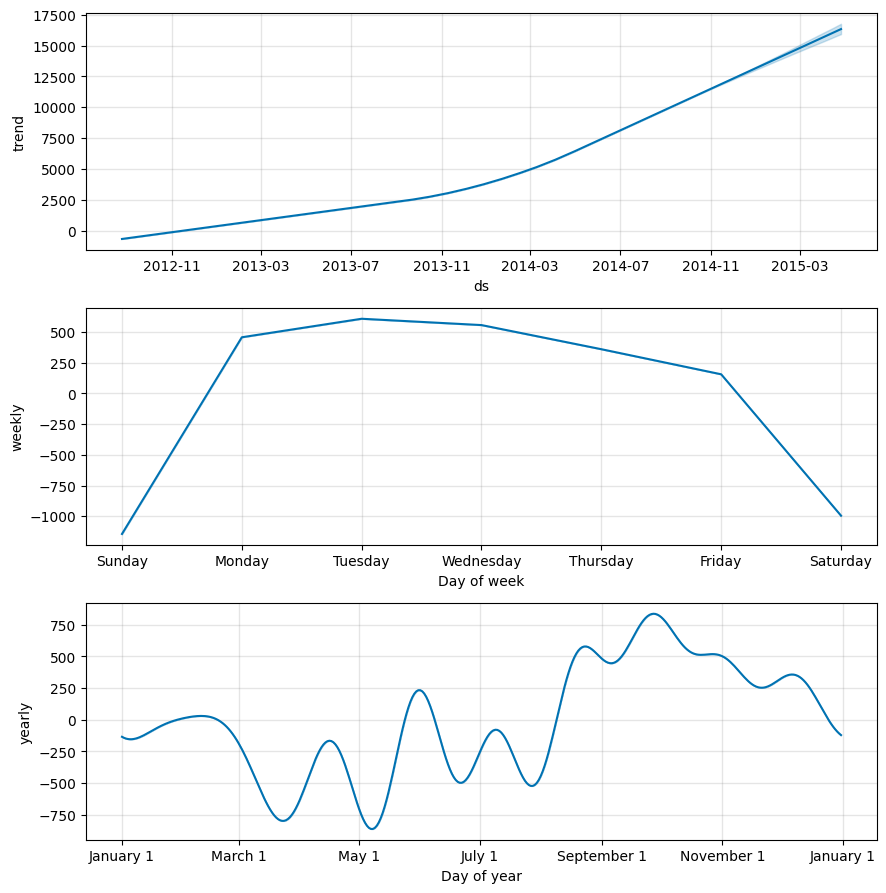

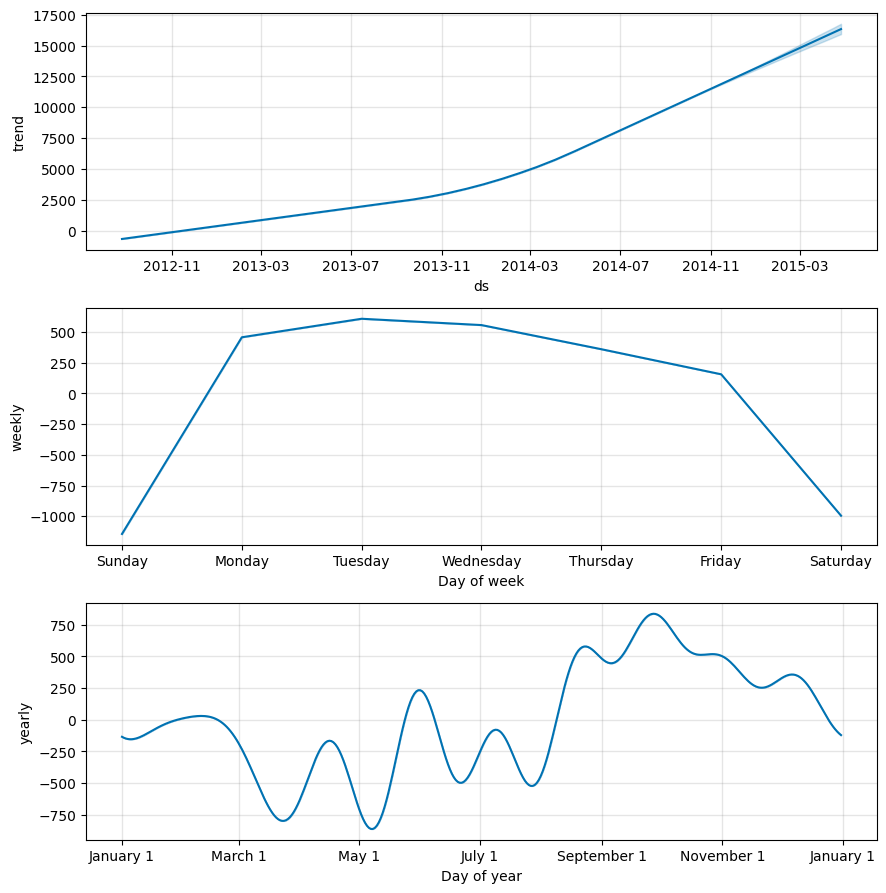

In [ ]:
m.plot_components(forecast)

In [ ]:
print(forecast)

            ds         trend    yhat_lower    yhat_upper   trend_lower  \
0   2012-08-25   -684.146271  -2269.574347    162.397574   -684.146271   
1   2012-08-26   -676.049942  -2358.678798    -35.634425   -676.049942   
2   2012-08-27   -667.953613   -824.735023   1570.426590   -667.953613   
3   2012-08-28   -659.857285   -728.702488   1760.091382   -659.857285   
4   2012-08-29   -651.760956   -777.618871   1585.494329   -651.760956   
..         ...           ...           ...           ...           ...   
970 2015-04-22  16235.695839  15239.887463  17706.840215  15840.181435   
971 2015-04-23  16263.178635  15136.547272  17599.692693  15865.174836   
972 2015-04-24  16290.661430  14763.664938  17419.028330  15888.572899   
973 2015-04-25  16318.144226  13591.855447  16200.983324  15910.984892   
974 2015-04-26  16345.627021  13556.962442  16136.916746  15934.978226   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0     -684.146271     -422.635

In [ ]:
print(train)
print(daily_train)

                     Count
Datetime                  
2012-08-25 00:00:00      8
2012-08-25 01:00:00      2
2012-08-25 02:00:00      6
2012-08-25 03:00:00      2
2012-08-25 04:00:00      2
...                    ...
2014-09-25 19:00:00    868
2014-09-25 20:00:00    732
2014-09-25 21:00:00    702
2014-09-25 22:00:00    580
2014-09-25 23:00:00    534

[18288 rows x 1 columns]
                   ds      y
Datetime                    
2012-08-25 2012-08-25     76
2012-08-26 2012-08-26     88
2012-08-27 2012-08-27     62
2012-08-28 2012-08-28     58
2012-08-29 2012-08-29     60
...               ...    ...
2014-09-21 2014-09-21   9102
2014-09-22 2014-09-22  14116
2014-09-23 2014-09-23  13304
2014-09-24 2014-09-24  16856
2014-09-25 2014-09-25  14152

[762 rows x 2 columns]


In [ ]:
# Extract hour, day, month and year from both dataframes to merge
# for df in [test, forecast]:
#     date_column = 'ds' if df.equals(forecast) else 'Datetime'
#     print(df.columns)
#     df[date_column] = pd.to_datetime(df[date_column])
#     print(df[date_column])

daily_train['hour'] = daily_train['ds'].dt.hour
train['day'] = train.Datetime.dt.day
train['month'] = train.Datetime.dt.month
train['year'] = train.Datetime.dt.year

# Merge forecasts with given IDs
test = pd.merge(test,forecast, on=['day','month','year'], how='left')
cols = ['ID','hour','yhat']
test_new = test[cols]

# Merging hourly average fraction to the test data
test_new = pd.merge(test_new, hourly_frac, left_on = ['hour'], right_index=True, how = 'left')
# Convert daily aggregate to hourly traffic
test_new['Count'] = test_new['yhat'] * test_new['fraction']
test_new.drop(['yhat','fraction','hour'],axis = 1, inplace = True)
test_new.to_csv('prophet_sub.csv',index = False)



AttributeError: 'DataFrame' object has no attribute 'Datetime'